In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [2]:
df = pd.read_csv("Cleaned.csv")
data=pd.read_csv("Balanced.csv")

In [3]:
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
             Serial          Year           Sex       Origin           Age  \
count  6.999600e+04  69996.000000  69996.000000  69996.00000  69996.000000   
mean   5.694758e+07   2012.261172      1.545560      1.55606      4.126307   
std    5.739857e+07      4.574000      0.497924      2.11312      1.939135   
min    2.500001e+06   2005.000000      1.000000     -9.00000      1.000000   
25%    2.707087e+06   2006.000000      1.000000      1.00000      3.000000   
50%    3.651760e+07   2013.000000      2.000000      1.00000      4.000000   
75%    1.144011e+08   2016.000000      2.000000      1.00000      6.000000   
max    1.839261e+08   2019.000000      2.000000     18.00000     17.000000   

             Height        Weight       CigUnit   AlcoholUnit      Diabetes  \
count  69996.000000  69996.000000  69996.000000  69996.000000  69996.000000   
mean     167.482405     77.482086      2.296495      1.948983      1.917067   
std        9.773253     17.301469      5

In [4]:
target_distribution = df["Diabetes"].value_counts(normalize=True)
print("\nDistribution of Diabetes Status:")
print(target_distribution)



Distribution of Diabetes Status:
Diabetes
2    0.917067
1    0.082933
Name: proportion, dtype: float64


In [5]:
target_distribution = data["Diabetes"].value_counts(normalize=True)
print("\nDistribution of Diabetes Status:")
print(target_distribution)


Distribution of Diabetes Status:
Diabetes
2    0.5
1    0.5
Name: proportion, dtype: float64


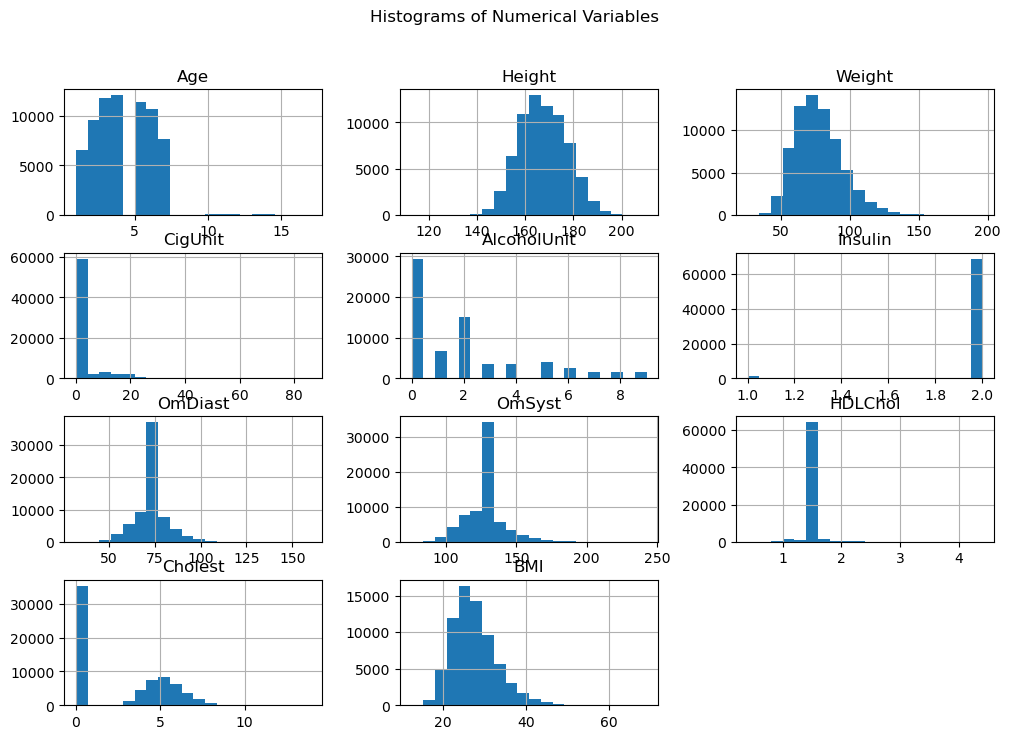

In [6]:
numerical_cols = ["Age", "Height", "Weight", "CigUnit", "AlcoholUnit", "Insulin", "OmDiast", "OmSyst", "HDLChol", "Cholest", "BMI"]
df[numerical_cols].hist(bins=20, figsize=(12, 8))
plt.suptitle("Histograms of Numerical Variables")
plt.show()

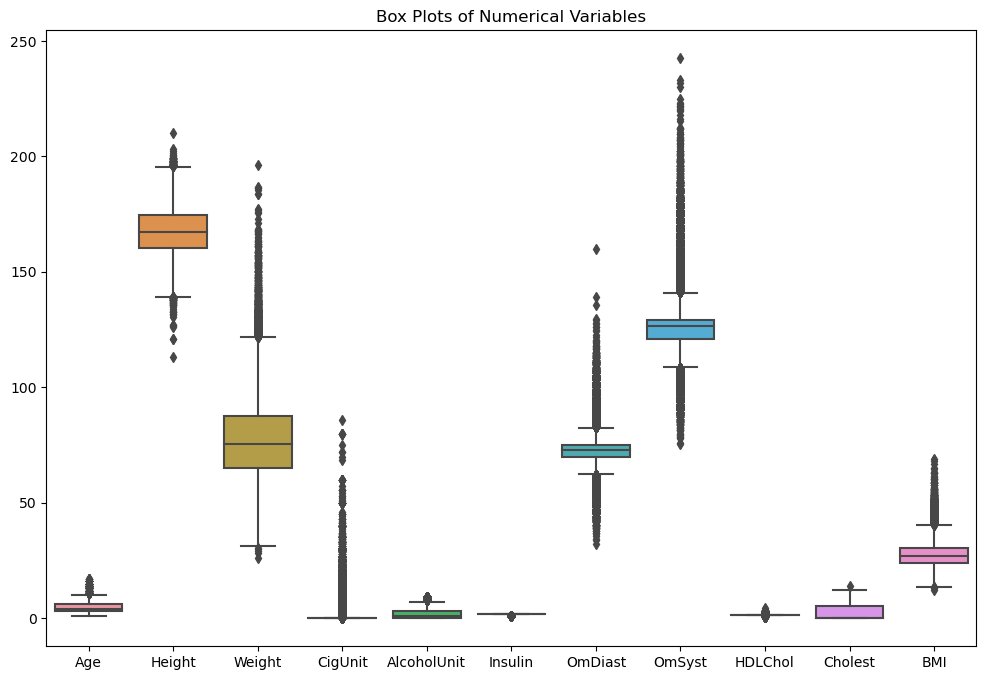

In [7]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_cols])
plt.title("Box Plots of Numerical Variables")
plt.show()

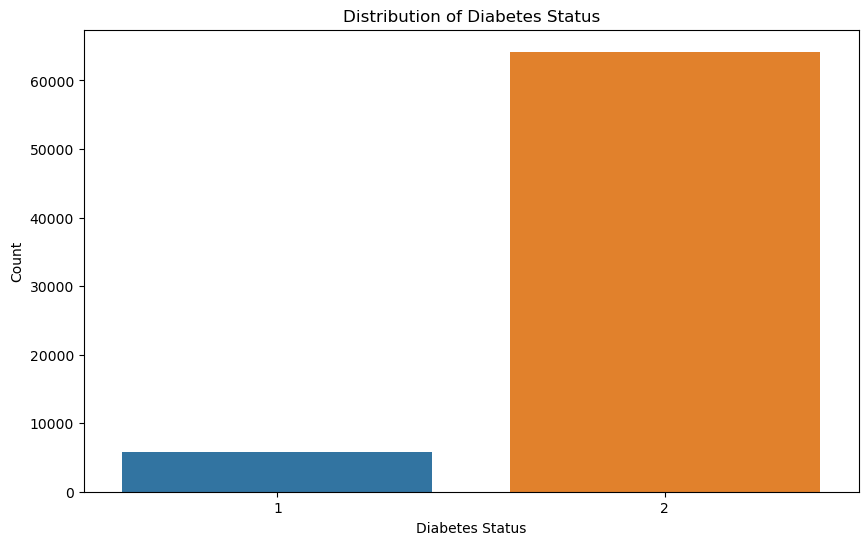

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Diabetes")
plt.title("Distribution of Diabetes Status")
plt.xlabel("Diabetes Status")
plt.ylabel("Count")
plt.show()


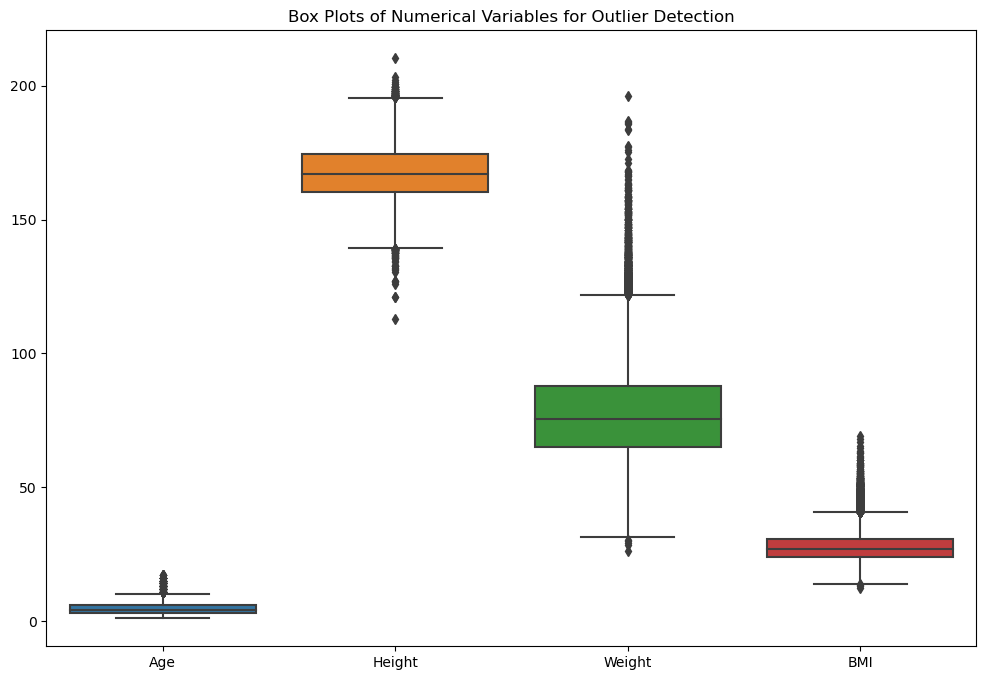

In [9]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[["Age", "Height", "Weight", "BMI"]])
plt.title("Box Plots of Numerical Variables for Outlier Detection")
plt.show()

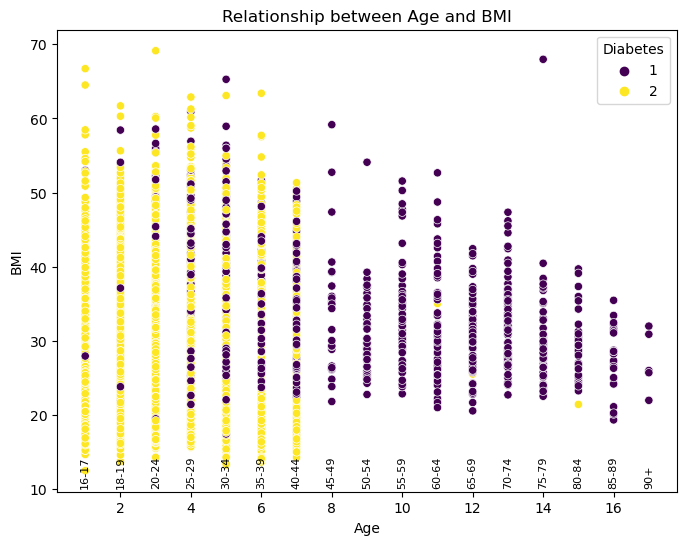

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='BMI', data=df, hue='Diabetes', palette='viridis')
plt.title('Relationship between Age and BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Diabetes')

# Add age range annotation
age_ranges = {
    1.0: '16-17', 2.0: '18-19', 3.0: '20-24',
    4.0: '25-29', 5.0: '30-34', 6.0: '35-39',
    7.0: '40-44', 8.0: '45-49', 9.0: '50-54',
    10.0: '55-59', 11.0: '60-64', 12.0: '65-69',
    13.0: '70-74', 14.0: '75-79', 15.0: '80-84',
    16.0: '85-89', 17.0: '90+'
}

for value, label in age_ranges.items():
    plt.text(value, 10, label, rotation=90, ha='center', va='bottom', fontsize=8)

plt.show()

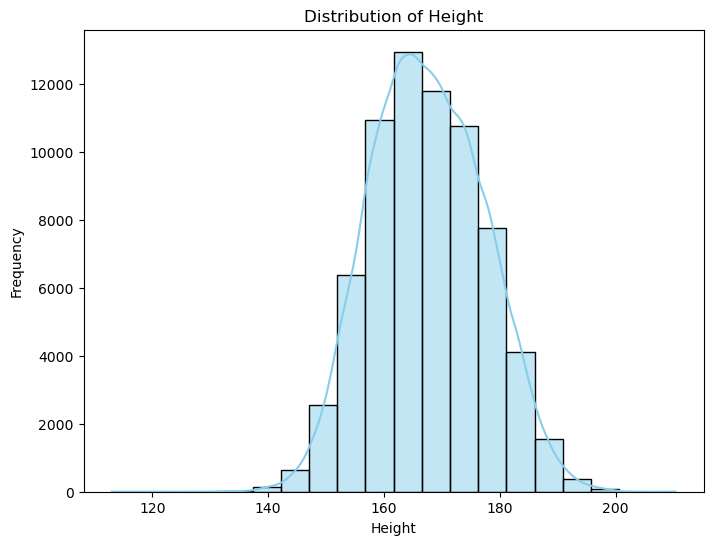

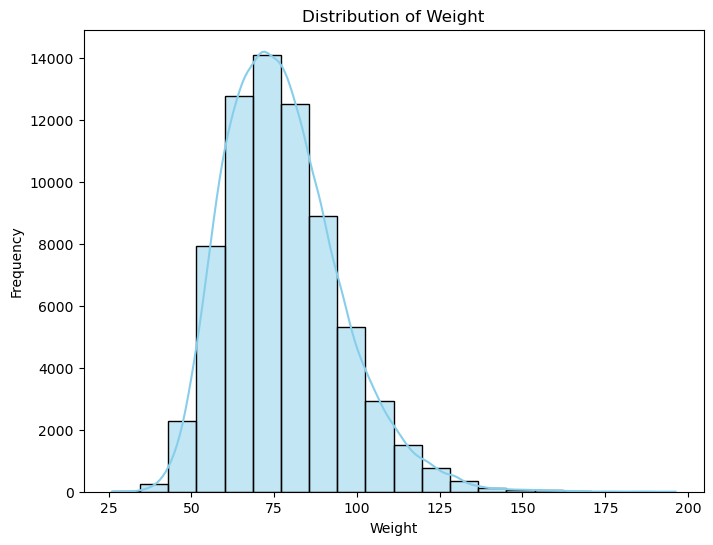

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Height'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Height')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['Weight'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()


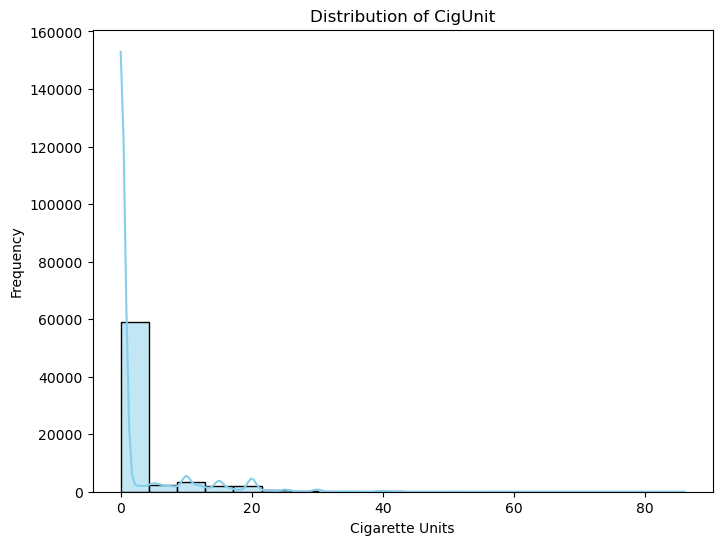

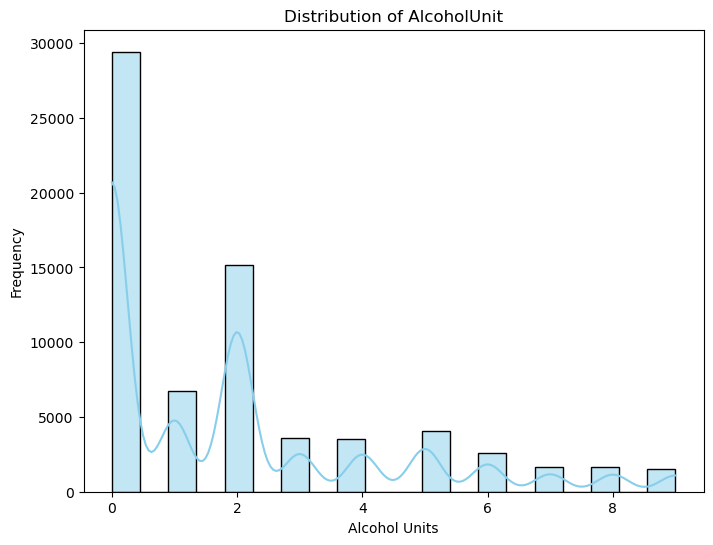

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(df['CigUnit'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of CigUnit')
plt.xlabel('Cigarette Units')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['AlcoholUnit'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of AlcoholUnit')
plt.xlabel('Alcohol Units')
plt.ylabel('Frequency')
plt.show()


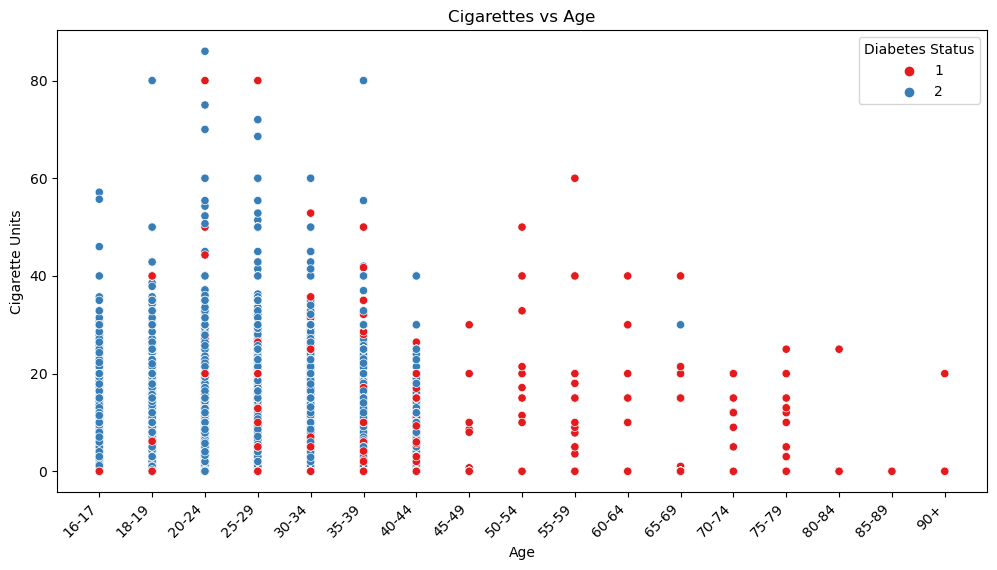

In [13]:

# Scatter plot of Cigarettes vs Age
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='CigUnit', data=df, hue='Diabetes', palette='Set1')

# Set x-axis ticks and labels
plt.xticks(list(age_ranges.keys()), list(age_ranges.values()), rotation=45, ha='right')

plt.title('Cigarettes vs Age')
plt.xlabel('Age')
plt.ylabel('Cigarette Units')
plt.legend(title='Diabetes Status')
plt.show()

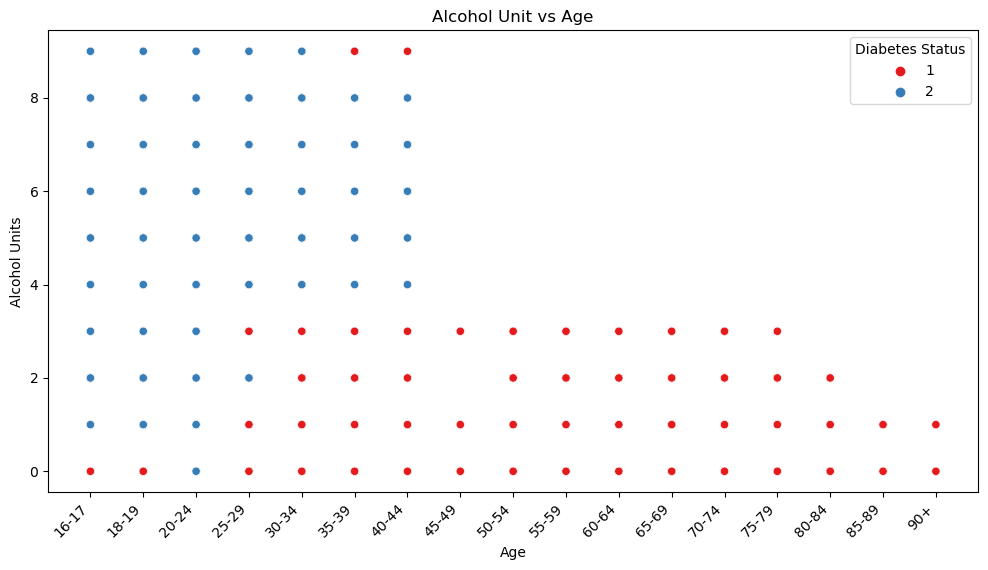

In [14]:

# Scatter plot of Cigarettes vs Age
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='AlcoholUnit', data=df, hue='Diabetes', palette='Set1')

# Set x-axis ticks and labels
plt.xticks(list(age_ranges.keys()), list(age_ranges.values()), rotation=45, ha='right')

plt.title('Alcohol Unit vs Age')
plt.xlabel('Age')
plt.ylabel('Alcohol Units')
plt.legend(title='Diabetes Status')
plt.show()

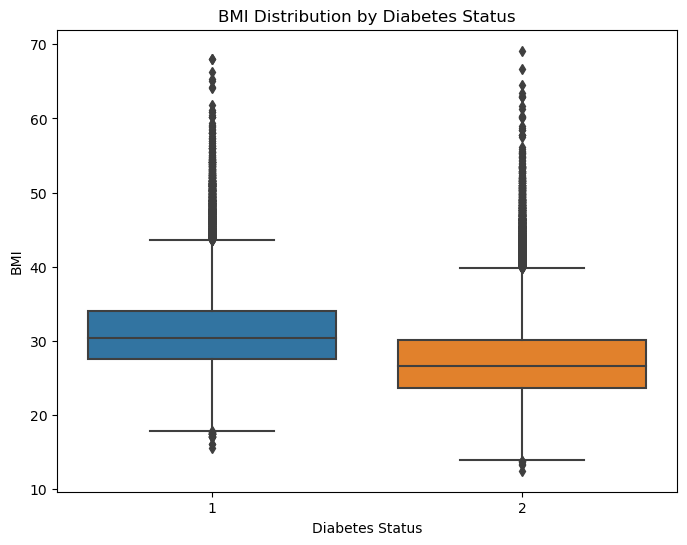

In [15]:
# Box plot of BMI by Diabetes Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diabetes', y='BMI', data=data)
plt.title('BMI Distribution by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('BMI')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


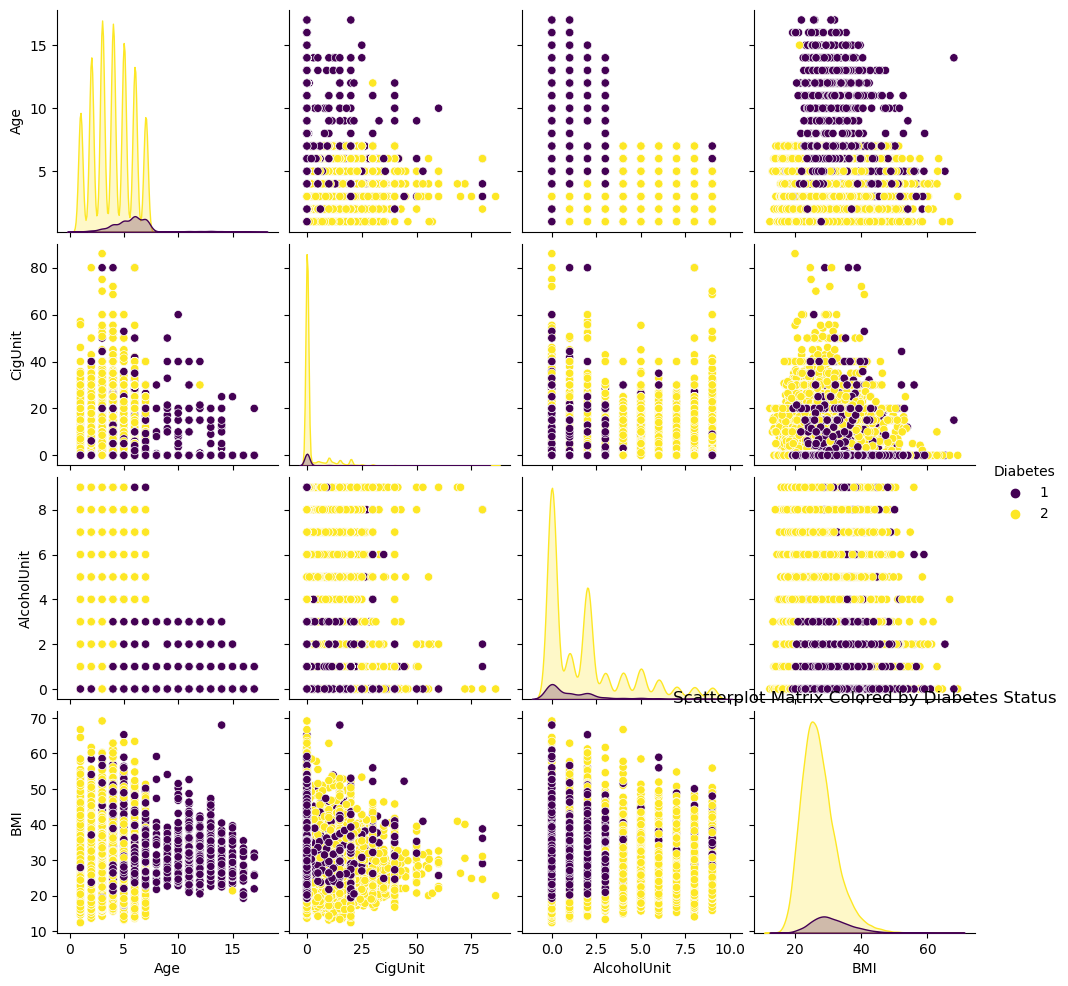

In [17]:
selected_columns = ['Age', 'CigUnit', 'AlcoholUnit', 'BMI', 'Diabetes']

# Create a scatterplot matrix colored by Diabetes Status
sns.pairplot(df[selected_columns], hue='Diabetes', palette='viridis')
plt.title('Scatterplot Matrix Colored by Diabetes Status')
plt.show()


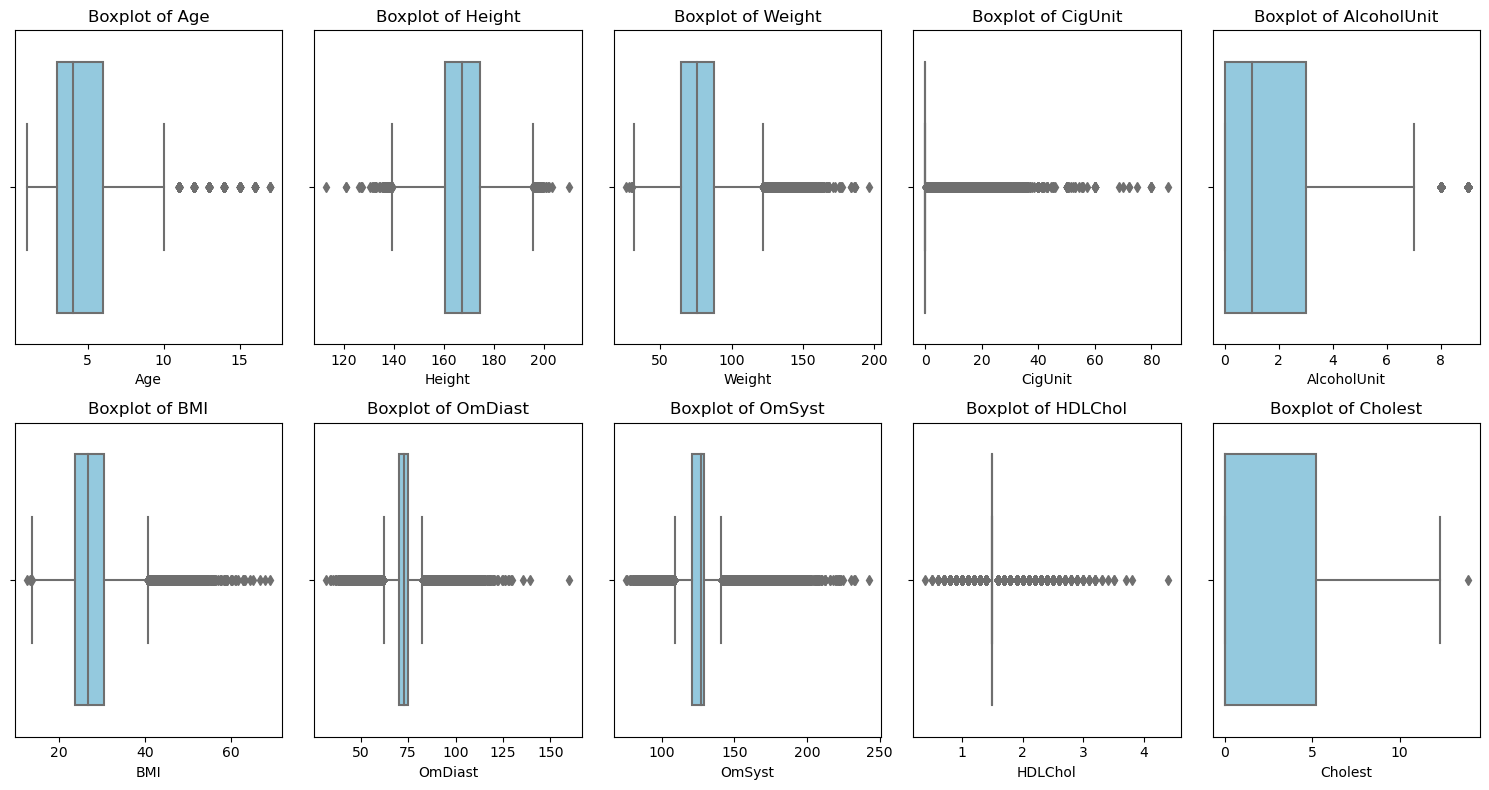

In [19]:
# Define numerical columns for outlier detection
numerical_columns = ['Age', 'Height', 'Weight', 'CigUnit', 'AlcoholUnit', 'BMI', 'OmDiast', 'OmSyst', 'HDLChol', 'Cholest']

# Visualize outliers using box plots
plt.figure(figsize=(15, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()


In [25]:
male_bmi = df[df['Sex'] == 1]['BMI']
female_bmi = df[df['Sex'] == 2]['BMI']
t_statistic, p_value = stats.ttest_ind(male_bmi, female_bmi)
print("Hypothesis Testing - Difference in BMI between Male and Female:")
print(f"T-statistic: {t_statistic}, p-value: {p_value}")


Hypothesis Testing - Difference in BMI between Male and Female:
T-statistic: 5.608459688417655, p-value: 2.0490312710175075e-08


In [37]:
crosstab = pd.crosstab(df['Diabetes'], df['CigUnit'])
chi2_statistic, p_value, _, _ = stats.chi2_contingency(crosstab)
print("\nChi-square Test - Association between Diabetes and Smoking Habits:")
print("Chi-square statistic:", chi2_statistic, ", p-value:", p_value)


Chi-square Test - Association between Diabetes and Smoking Habits:
Chi-square statistic: 376.3780341706642 , p-value: 5.801919618153855e-12


In [38]:
crosstab = pd.crosstab(df['Diabetes'], df['AlcoholUnit'])
chi2_statistic, p_value, _, _ = stats.chi2_contingency(crosstab)
print("\nChi-square Test - Association between Diabetes and Alcohol Habits:")
print("Chi-square statistic:", chi2_statistic, ", p-value:", p_value)


Chi-square Test - Association between Diabetes and Alcohol Habits:
Chi-square statistic: 552.8597206947553 , p-value: 2.7130247222573843e-113
